<a href="https://colab.research.google.com/github/adytiapp/hotel_booking_cancellation/blob/main/Hotel_Booking_Clustering_Final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Develop a Unsupervised Learning method using Customer Segmentation to Identify Hidden Insights in Hotel Booking Cancellation***

---



### ***Dataset Description***
This data collection comprises reservation details for a city hotel and a resort hotel, such as the date the reservation was made, the duration of the stay, the number of people, kids, and/or babies, and the number of parking spaces available, among other details.

### ***Goal***
The aim of this study is to unwrap the insights on booking cancellation using unsupervised learning

### ***Objectives***
1. To conduct Data pre-processing
2. To build Regression model and evaluate to find the suitable model
3. To tune the hyperparameter in order to stabilize the accuracy

# ***Unsupervised Learning***

---


## ***Import Libraries***

---


In [3]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import re
#import KPrototypes
import pickle
%matplotlib inline
#plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,15))
from warnings import filterwarnings
filterwarnings('ignore')

<Figure size 1080x1080 with 0 Axes>

In [5]:
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

RANDOM_STATE = 42

## ***Data Preparation and Cleaning***

---



In [6]:
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hotel_bookings.csv')
raw_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Making a copy so the original dataset isn't affected

In [7]:
d = raw_data.copy()
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## ***Preprocessing***

---



### ***Handling Missing Data***

---



In [ ]:
data_cln = d.copy()

In [ ]:
feature_nan = [feature for feature in data_cln.columns if data_cln[feature].isnull().sum()>1]
for feature in feature_nan:
    print('{} : {}% Missing values'.format(feature,np.around(data_cln[feature].isnull().mean(),4)))

children : 0.0% Missing values
country : 0.0041% Missing values
agent : 0.1369% Missing values
company : 0.9431% Missing values


From the above Analysis, it shows percentage of missing values in feature.


- "Company" feature has almost 94% missing values. Therefore, we do not have enough values to fill the rows or Impute the company column by mean, median etc. Hence we can drop the "Company" feature.
- "Agent" feature has 13.69% missing values. "Agent" feature is travel agency Id and these values are unique and we cannot impute Id by mean, median or mode. Since, missing values are 13% of all data we can't drop them. Therefore, missing data for "Agent" can be filled by 0.
-"Country" feature has 0.4% missing values. Since missing data of "Country" is less than 1%, we can will impute with most frequent value (Mode).
- "Children" feature has only 4 missing values and we can fill these missing values by 0 considering guests have no children.

---



In [ ]:
#Dropping the "Company" feature
data_cln.drop(columns = ['company'],inplace= True)

#Filling missing values by 0 for "Agent" feature
data_cln['agent']= data_cln['agent'].fillna(0)

#Imputing missing values of "Country" feature
data_cln['country'].fillna(data_cln['country'].mode()[0], inplace=True)

#Filling missing values by 0 for "Children" feature 
data_cln['children']= data_cln['children'].fillna(0)

In [ ]:
#data_cln = data_cln.dropna()
data_cln.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
data_cln.shape

(119390, 31)

### ***Data Transformation***

---


In [ ]:
data_tran = data_cln.copy()

In [ ]:
cat_feature = [feature for feature in data_tran.columns if data_tran[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(cat_feature))
print(" ")
print("List of categorical features       :",cat_feature)

Number of Categorical Features are :  12
 
List of categorical features       : ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


**Let us check how many unique (Distinct) labels exists in each categorical features**

---



In [ ]:
for feature in cat_feature:
    print("{} : {} labels ".format(feature,len(data_tran[feature].unique())))

hotel : 2 labels 
arrival_date_month : 12 labels 
meal : 5 labels 
country : 177 labels 
market_segment : 8 labels 
distribution_channel : 5 labels 
reserved_room_type : 10 labels 
assigned_room_type : 12 labels 
deposit_type : 3 labels 
customer_type : 4 labels 
reservation_status : 3 labels 
reservation_status_date : 926 labels 


The “Market Segment” attribute entries in the dataset are categorical and these values should be encoded to apply cluster analysis on the dataset to cluster or group by market segment type.

To encode the “market segment” feature, I will apply a custom mapping technique to convert it into a numeric feature.


---



In [ ]:
data_tran['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
#Custom mapping
data_tran['hotel'] = data_tran['hotel'].map({'Resort Hotel':0, 'City Hotel':1})
data_tran['arrival_date_month'] = data_tran['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
data_tran['market_segment'] = data_tran['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO' : 3,
      'Complementary' : 4, 'Groups' : 5, 'Aviation' : 6, 'Undefined' : 0 })

In [ ]:
#Replacing "Undefined" with "SC" as mentioned in data set description
data_tran["meal"].replace("Undefined", "SC", inplace=True)

In [ ]:
#Combining day stays
data_tran['total_day_stays'] =data_tran['stays_in_week_nights'] + data_tran['stays_in_weekend_nights']

In [ ]:
#Applying label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data_tran['meal'] = le.fit_transform(data_tran['meal'])
data_tran['arrival_date_month'] = le.fit_transform(data_tran['arrival_date_month'])
data_tran['deposit_type'] = le.fit_transform(data_tran['deposit_type'])
data_tran['customer_type'] = le.fit_transform(data_tran['customer_type'])
data_tran['distribution_channel'] = le.fit_transform(data_tran['distribution_channel'])
data_tran['reserved_room_type'] = le.fit_transform(data_tran['reserved_room_type'])
data_tran['assigned_room_type']= le.fit_transform(data_tran['assigned_room_type'])
data_tran['reservation_status'] = le.fit_transform(data_tran['reservation_status'])
data_tran['reservation_status_date'] = le.fit_transform(data_tran['reservation_status_date'])
data_tran['country'] = le.fit_transform(data_tran['country'])

In [ ]:
#dont run/ delete
#Converting arrival_date to timeseries

#Combine the date data
data_tran ['arrival_date'] = data_tran ['arrival_date_day_of_month'].astype(str) + '-' + data_tran ['arrival_date_month'] + '-' + data_tran ['arrival_date_year'].astype(str)

#Converting the data type to timeseries
from datetime import datetime
data_tran['arrival_date'] = pd.to_datetime(data_tran['arrival_date'])

#Changing arrival_date_month
data_tran = data_tran.drop(['arrival_date_month'],axis=1)
data_tran['arrival_date_month'] = data_tran['arrival_date'].dt.month

#Dropping unnecesarry collumn
data_tran = data_tran.drop(['arrival_date_day_of_month'],axis=1)

#Combining day stays
data_tran['total_day_stays'] = data_tran['stays_in_week_nights'] + data_tran['stays_in_weekend_nights']

#Combining amount of guests
data_tran['total_guests'] = data_tran['adults'] + data_tran['children'] + data_tran['babies']

#Changing datatype from float to int
cols = ['total_guests']
data_tran[cols] = data_tran[cols].applymap(np.int64)

data_tran['children'] = data_tran['children'].astype(int)

In [ ]:
#donr run | delete
cat_columns = ['hotel']

for i in cat_columns:
  data_tran[i] = data_tran[i].astype('category')
  data_tran[i] = data_tran[i].cat.codes

In [ ]:
#dont run | delete
def camel_to_snake(name):
    name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()

In [ ]:
#donr run | delete
data_tran.columns = data_tran.columns.map(camel_to_snake)

In [ ]:
#donr run | delete
features = ['meal', 'reserved_room_type', 'assigned_room_type', 'deposit_type']
for feature in features: 
    data_tran[feature] = data_tran[feature].str.strip()

In [ ]:
data_tran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50907 entries, 0 to 51388
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           50907 non-null  int8          
 1   is_canceled                     50907 non-null  int64         
 2   lead_time                       50907 non-null  int64         
 3   arrival_date_year               50907 non-null  int64         
 4   arrival_date_week_number        50907 non-null  int64         
 5   stays_in_weekend_nights         50907 non-null  int64         
 6   stays_in_week_nights            50907 non-null  int64         
 7   adults                          50907 non-null  int64         
 8   children                        50907 non-null  int64         
 9   babies                          50907 non-null  int64         
 10  meal                            50907 non-null  object        
 11  co

In [ ]:
data_tran.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_day_stays
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.664461,0.370416,104.011416,2016.156554,5.552483,27.165173,15.798241,0.927599,2.500302,1.856403,...,0.124893,74.828319,2.321149,2.137323,101.831122,0.062518,0.571363,0.649803,516.750147,3.427900
std,0.472181,0.482918,106.863097,0.707476,3.090619,13.605138,8.780829,0.998613,1.908286,0.579261,...,0.334678,107.141953,17.594721,0.577040,50.535790,0.245291,0.792798,0.497776,227.476419,2.557439
min,0.000000,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,18.000000,2016.000000,3.000000,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,7.000000,0.000000,2.000000,69.290000,0.000000,0.000000,0.000000,336.000000,2.000000
50%,1.000000,0.000000,69.000000,2016.000000,6.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,9.000000,0.000000,2.000000,94.575000,0.000000,0.000000,1.000000,524.000000,3.000000
75%,1.000000,1.000000,160.000000,2017.000000,8.000000,38.000000,23.000000,2.000000,3.000000,2.000000,...,0.000000,152.000000,0.000000,2.000000,126.000000,0.000000,1.000000,1.000000,709.000000,4.000000
max,1.000000,1.000000,737.000000,2017.000000,11.000000,53.000000,31.000000,19.000000,50.000000,55.000000,...,2.000000,535.000000,391.000000,3.000000,5400.000000,8.000000,5.000000,2.000000,925.000000,69.000000


Interpretation: The adr feature (average daily rate) seems to have outliers. With a minimum of -6.38 and a maximum of 5400. A negative ADR could be possible if a hotel had to compensate a guest for some reason. While those numbers are surprising, we do not have enough information to assure that those observations are not accurate datapoints.

Note: For modeling puposes, we ran our model with and without those outliers and removing them lead to a decrease in predictive power. As a result, we did not remove those observations.

Visualizing Corellation Coefficients

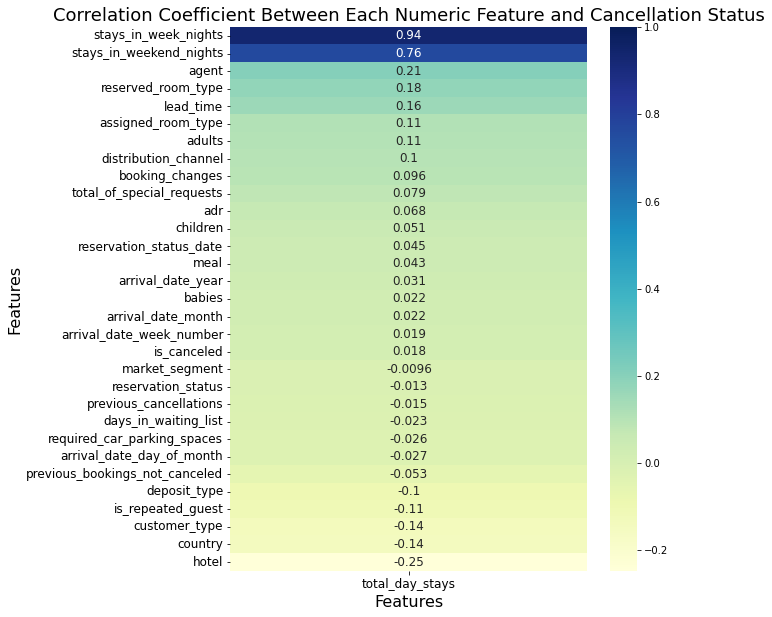

In [ ]:
# Visualizing correlation coefficients between features and cancellation:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(data_tran.corr()[['total_day_stays']].sort_values('total_day_stays', ascending=False), annot = True, annot_kws = {"size":12}, cmap='YlGnBu')
ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancellation Status', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

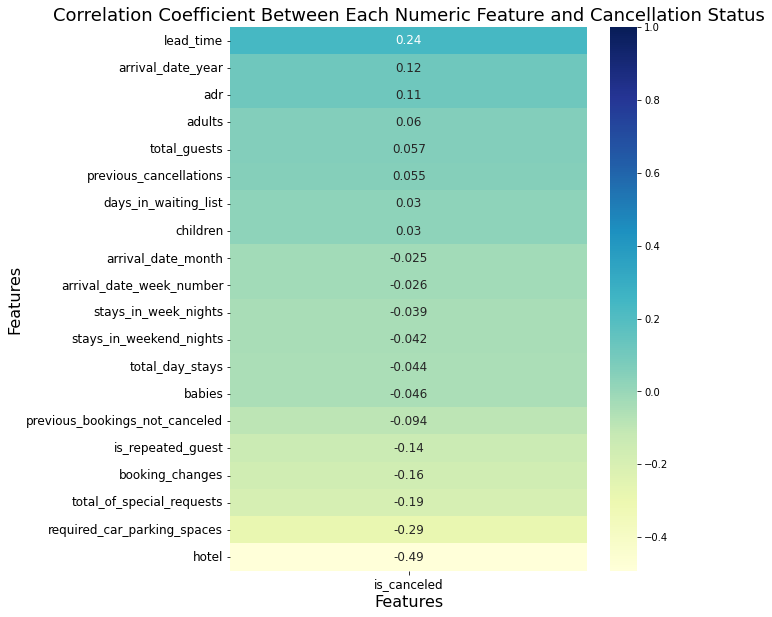

In [ ]:
# Visualizing correlation coefficients between features and cancellation:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(data_tran.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='YlGnBu')
ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancellation Status', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

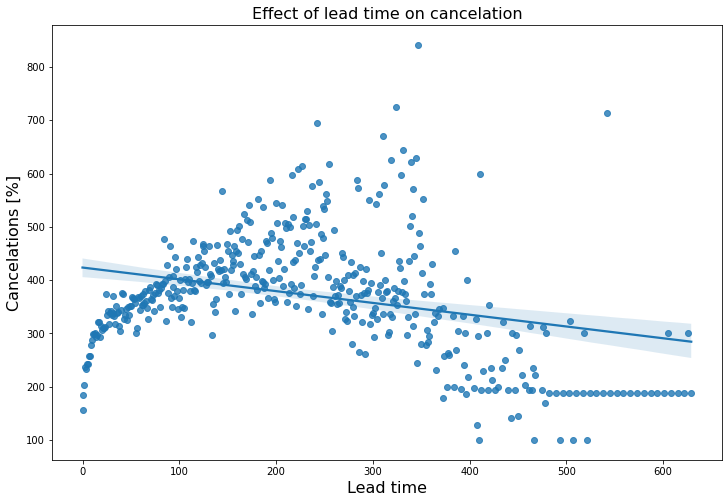

In [ ]:
# group data for lead_time:
lead_cancel_data = data_tran.groupby("lead_time")["total_day_stays"].describe()
# use only lead_times wih more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

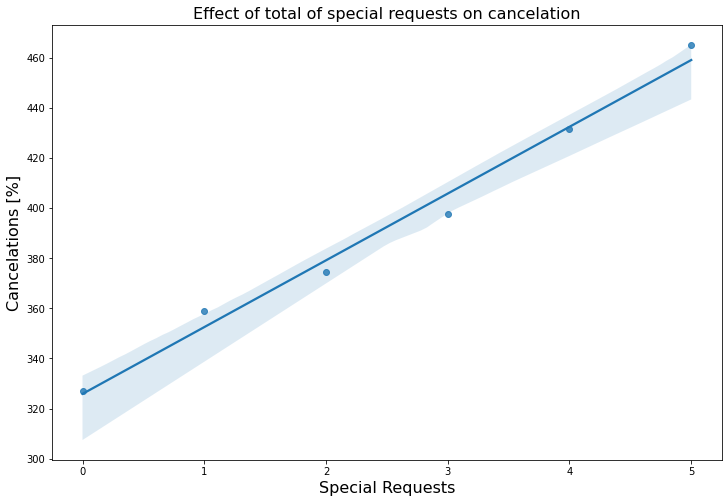

In [ ]:
# group data for special requests:
requests_cancel_data = data_tran.groupby("total_of_special_requests")["total_day_stays"].describe()

#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=requests_cancel_data.index, y=requests_cancel_data["mean"].values * 100)
plt.title("Effect of total of special requests on cancelation", fontsize=16)
plt.xlabel("Special Requests", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

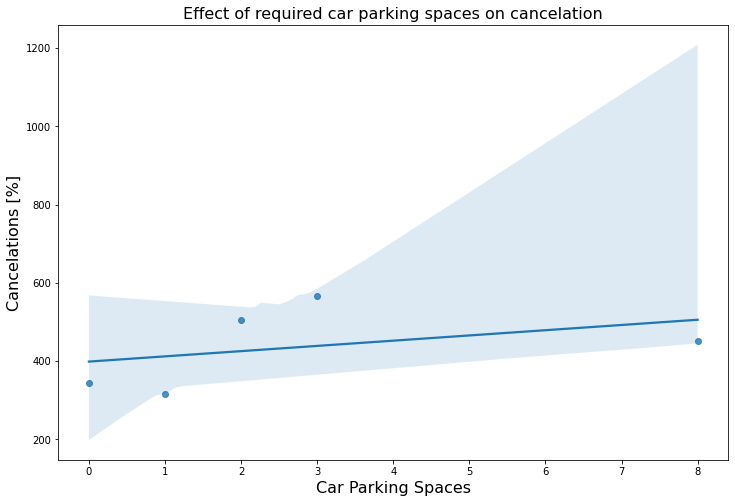

In [ ]:
# group data for parking spaces:
parking_cancel_data = data_tran.groupby("required_car_parking_spaces")["total_day_stays"].describe()

#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=parking_cancel_data.index, y=parking_cancel_data["mean"].values * 100)
plt.title("Effect of required car parking spaces on cancelation", fontsize=16)
plt.xlabel("Car Parking Spaces", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

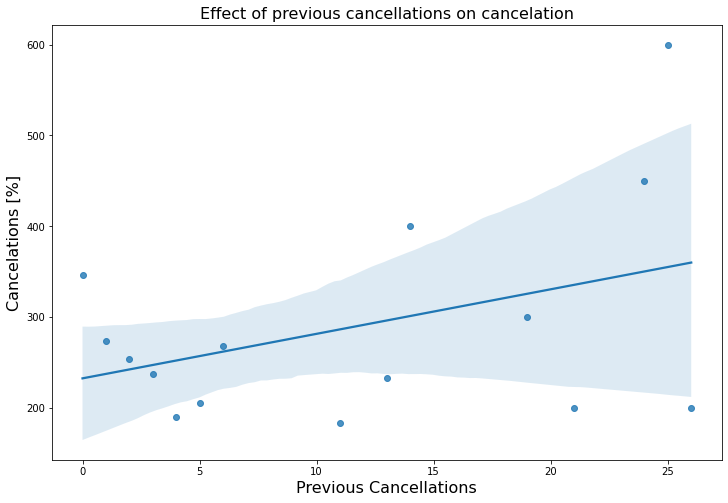

In [ ]:
# group data for prev cancellations:
prev_cancel_data = data_tran.groupby("previous_cancellations")["total_day_stays"].describe()

#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=prev_cancel_data.index, y=prev_cancel_data["mean"].values * 100)
plt.title("Effect of previous cancellations on cancelation", fontsize=16)
plt.xlabel("Previous Cancellations", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

# Clustering

To avoid data leakage about  target data into our clusters since those clusters will later be used as features in our predictive model. As a result, I decided to remove is_canceled, reservation_status, and country from our X variable.

The agent and company IDs recorded in the agent and company features include a large amount of categorical data that is de-identified and therefore difficult to interpret. As a result, those features were not included in the clustering model. Finally, as k-means models cannot take in datetime objects as features, the reservation_status_date and arrival_date_full features were also excluded from the clustering model. 

## ***K-means Clustering***

---



In [ ]:
from scipy import stats
import numpy as np
# remove the customer id column
x= data_tran[['total_day_stays','lead_time','agent','reserved_room_type','market_segment']]
# remove outliers
z_scores = stats.zscore(x)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = x[filtered_entries]

In [ ]:
from sklearn.preprocessing import StandardScaler
new_df = new_df.drop_duplicates()
col_names = ['total_day_stays','lead_time','agent','reserved_room_type','market_segment']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

### ***Finding Number of clusters***

---



Text(0, 0.5, 'Inertia')

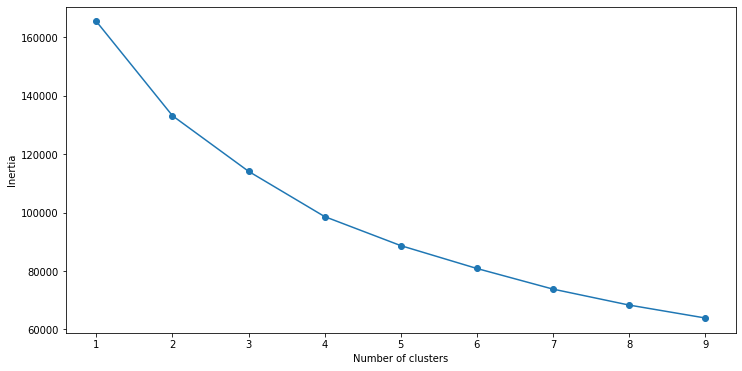

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

### ***Build k-means***

---



In [ ]:
# First, build a model with 4 clusters
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

### ***Model Evaluation***

---



In [ ]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred

In [ ]:
#Renaming the clusters:
frame['clusters'] = frame['clusters'].map({0:'total_guests', 1:'repeated_guests', 2:'canceled', 3:'LOS'})

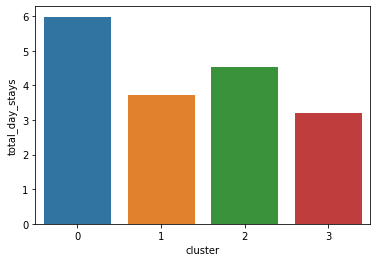

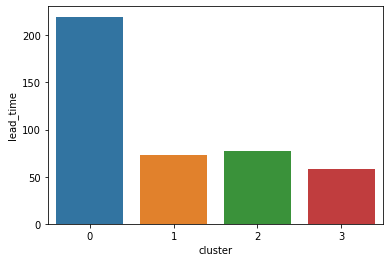

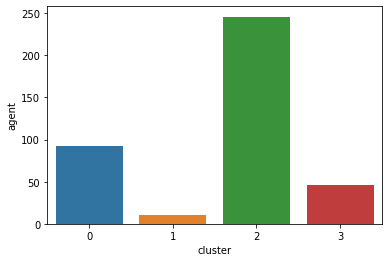

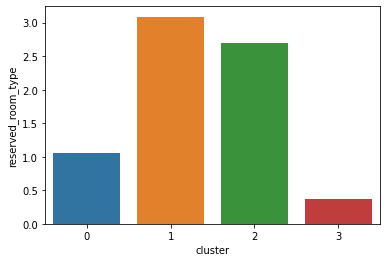

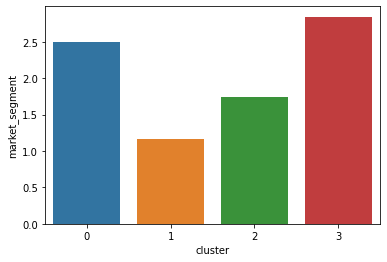

In [ ]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
list1= ['total_day_stays','lead_time','agent','reserved_room_type','market_segment']
for i in list1:
    sns.barplot(x='cluster',y=str(i), data=avg_df)
    plt.show()

***Findings***

---
Real-world customer segmentation projects will help us to come up with actionable insights that the marketing team can use to improve sales, just like the work I did above


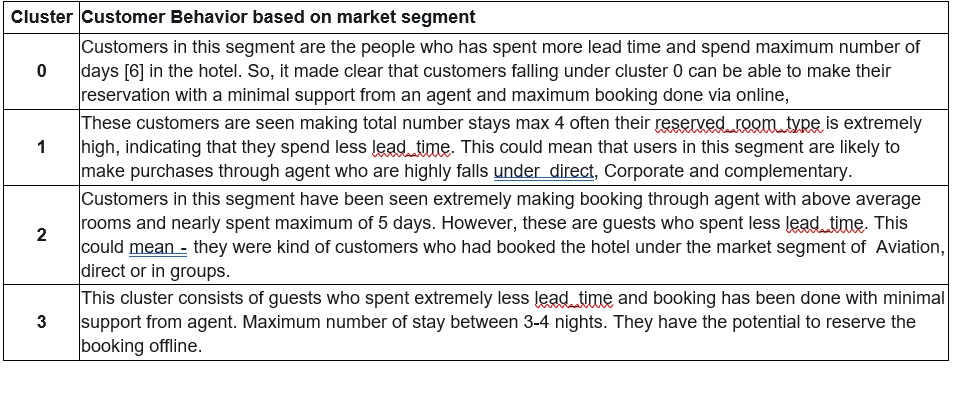

In [ ]:
k = KMeans( n_clusters = 4, init='k-means++')
km = k.fit(scaled_features)

In [ ]:
# Creating a "clusters" feature in our dataset:
x['Cluster'] = k

In [ ]:
pd.set_option('display.max_rows', None)
x.groupby(x['Cluster']).describe(include='all').T

Cluster                   KMeans(n_clusters=4)
total_day_stays    count         119390.000000
                   mean               3.427900
                   std                2.557439
                   min                0.000000
                   25%                2.000000
                   50%                3.000000
                   75%                4.000000
                   max               69.000000
lead_time          count         119390.000000
                   mean             104.011416
                   std              106.863097
                   min                0.000000
                   25%               18.000000
                   50%               69.000000
                   75%              160.000000
                   max              737.000000
agent              count         119390.000000
                   mean              74.828319
                   std              107.141953
                   min                0.000000
                   25%                7.000000
                   50%                9.000000
                   75%              152.000000
                   max              535.000000
reserved_room_type count         119390.000000
                   mean               0.989505
                   std                1.697282
                   min                0.000000
                   25%                0.000000
                   50%                0.000000
                   75%                3.000000
                   max                9.000000
market_segment     count         119390.000000
                   mean               2.465491
                   std                1.415283
                   min                0.000000
                   25%                2.000000
                   50%                2.000000
                   75%                3.000000
                   max                6.000000

In [ ]:
df2 = pd.DataFrame(x.groupby(['Cluster','market_segment'])['market_segment'].count())
display(df2)
print("Labels of Market_segment")
print("0 --> Direct | 1 --> Corporate | 2 --> Online TA | 3 --> Offline TA/TO | 4 --> Complementary | 5 --> Groups | 6 --> Aviation")


market_segment
Cluster              market_segment                
KMeans(n_clusters=4) 0                        12608
                     1                         5295
                     2                        56477
                     3                        24219
                     4                          743
                     5                        19811
                     6                          237

Labels of Market_segment
0 --> Direct | 1 --> Corporate | 2 --> Online TA | 3 --> Offline TA/TO | 4 --> Complementary | 5 --> Groups | 6 --> Aviation


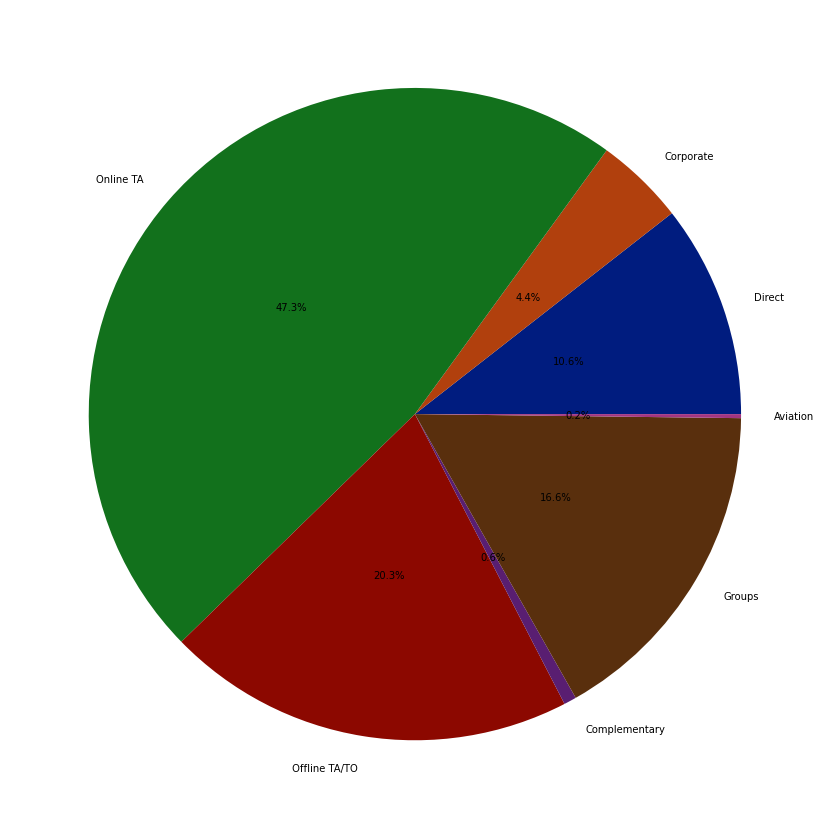

In [ ]:
import seaborn
pie, ax = plt.subplots(figsize=[15,15])
# declaring data
keys = ['Direct', 'Corporate', 'Online TA', ' Offline TA/TO', 'Complementary','Groups', 'Aviation']

# define Seaborn color palette to use
palette_color = seaborn.color_palette('dark')
  
# plotting data on chart
plt.pie(df2, labels=keys, colors=palette_color,  autopct="%.1f%%", pctdistance = 0.5)
  
# displaying chart
plt.show()

In [ ]:
df3 = pd.DataFrame(x.groupby(['Cluster','total_day_stays','market_segment'])['market_segment'].count())
display(df3)

market_segment
Cluster              total_day_stays market_segment                
KMeans(n_clusters=4) 0               0                          136
                                     1                           53
                                     2                          312
                                     3                          149
                                     4                           23
                                     5                           36
                                     6                            6
                     1               0                         4093
                                     1                         2738
                                     2                         9227
                                     3                         2675
                                     4                          414
                                     5                         1808
                                     6                           65
                     2               0                         2203
                                     1                         1229
                                     2                        10266
                                     3                         5611
                                     4                          233
                                     5                         8052
                                     6                           49
                     3               0                         1908
                                     1                          668
                                     2                        12837
                                     3                         6406
                                     4                           39
                                     5                         5177
                                     6                           41
                     4               0                         1380
                                     1                          318
                                     2                        10166
                                     3                         2868
                                     4                            9
                                     5                         2610
                                     6                           32
                     5               0                          872
                                     1                           55
                                     2                         4902
                                     3                         1393
                                     4                           12
                                     5                          537
                                     6                           13
                     6               0                          490
                                     1                           21
                                     2                         2319
                                     3                          719
                                     4                            2
                                     5                          304
                                     6                            2
                     7               0                          863
                                     1                           47
                                     2                         4007
                                     3                         2738
                                     4                            4
                                     5                          992
                                     6                            4
                     8               0                          164
                                     1   

In [ ]:
datatoexcel1 = pd.ExcelWriter('/content/drive/MyDrive/Colab Notebooks/hoteldata_rev2.xlsx')
df3.to_excel(datatoexcel1)
datatoexcel1.save()

In [ ]:
print('Silhouette Coefficient of k-means Output:' , round(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'),2))

Silhouette Coefficient of k-means Output: 0.2


In [ ]:
from sklearn.cluster import KMeans
km3 = KMeans (n_clusters=3,random_state=42)
km3.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

In [ ]:
identified_clusters3 = km3.fit_predict(scaled_features)
identified_clusters3

array([1, 0, 0, ..., 2, 1, 1], dtype=int32)

The Silhouette Coefficient of 0.37 frm 0.2 indicates that the k-means algorithm was successful at grouping the hotel bookings into 4 clusters (K= 4).

Depending on how a hotel would utilize these clusters, the k-means output could still provide business value despite the lack of clear separation between the clusters.

---



# K Prototypes

Since our data is a mix of categorical and numeric features, K-prototypes is the most appropriate model to create clusters.

---



In [ ]:
x = data_tran.drop(columns=['is_canceled', 'reservation_status', 'country', 'reservation_status_date', 'arrival_date'])
x.head()

,hotel,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_month,total_day_stays,total_guests
0,1,342,2015,27,0,0,2,0,0,BB,...,3,No Deposit,0,Transient,0.0,0.0,0.0,7,0,2
1,1,737,2015,27,0,0,2,0,0,BB,...,4,No Deposit,0,Transient,0.0,0.0,0.0,7,0,2
2,1,7,2015,27,0,1,1,0,0,BB,...,0,No Deposit,0,Transient,75.0,0.0,0.0,7,1,1
3,1,13,2015,27,0,1,1,0,0,BB,...,0,No Deposit,0,Transient,75.0,0.0,0.0,7,1,1
4,1,14,2015,27,0,2,2,0,0,BB,...,0,No Deposit,0,Transient,98.0,0.0,1.0,7,2,2


In order to identify the best number of clusters to create, we need to evaluate the K-Protypes costs for different numbers of clusters. Here, we will try creating 3 to 7 clusters.

In [ ]:
# Creating a loop to try our different number of clusters: 
kproto_costs = []
for n in range(3, 7):
    #do the clustering 
    kproto = KPrototypes(n_clusters=n, init='Huang', verbose=0, random_state=RANDOM_STATE, n_jobs=-1)
    clusters = kproto.fit_predict(x, categorical=[9, 10, 11, 12, 13, 15, 16, 18, 20])
    print(f'cost: {kproto.cost_}')
    print(f'iter: {kproto.n_iter_}')
    
    # get cost 
    cost = kproto.cost_
    
    #gather them
    kproto_costs.append((n, cost))

cost: 250441790.91538182
iter: 10
cost: 192062451.78166315
iter: 12
cost: 167516794.1833685
iter: 9
cost: 145027101.03749442
iter: 15


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Creating a dataframe for our K-Prototypes clusters: 
kproto_costs_df = pd.DataFrame(kproto_costs, columns=['n', 'cost'])
kproto_costs_df

,n,cost
0,3,6.032320e+08
1,4,4.802041e+08
2,5,4.165284e+08
3,6,3.709368e+08


In [ ]:
# Creating the 4 customer clusters:
kproto_4 = KPrototypes(n_clusters=4, init='Huang', verbose=0, random_state=RANDOM_STATE, n_jobs=-1)
clusters = kproto_4.fit_predict(x, categorical=[9, 10, 11, 12, 13, 15, 16, 18, 20])
print(f'cost: {kproto_4.cost_}')

cost: 480204092.1957018


In [ ]:
# Creating a "clusters" feature in our dataset:
data_tran['clusters'] = clusters

In [ ]:
pd.set_option('display.max_rows', None)
data_tran.groupby(data_tran['clusters']).describe(include='all').T

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/groupby.py:1973: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/groupby.py:1973: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/groupby.py:1973: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime

clusters                                                 0  \
hotel                          count               14311.0   
                               unique                  NaN   
                               top                     NaN   
                               freq                    NaN   
                               first                   NaN   
                               last                    NaN   
                               mean                0.25966   
                               std                0.438464   
                               min                     0.0   
                               25%                     0.0   
                               50%                     0.0   
                               75%                     1.0   
                               max                     1.0   
is_canceled                    count               14311.0   
                               unique                  NaN   
                               top                     NaN   
                               freq                    NaN   
                               first                   NaN   
                               last                    NaN   
                               mean                0.64426   
                               std                0.478754   
                               min                     0.0   
                               25%                     0.0   
                               50%                     1.0   
                               75%                     1.0   
                               max                     1.0   
lead_time                      count               14311.0   
                               unique                  NaN   
                               top                     NaN   
                               freq                    NaN   
                               first                   NaN   
                               last                    NaN   
                               mean              327.02837   
                               std               73.037293   
                               min                   235.0   
                               25%                   275.0   
                               50%                   306.0   
                               75%                   356.5   
                               max                   737.0   
arrival_date_year              count               14311.0   
                               unique                  NaN   
                               top                     NaN   
                               freq                    NaN   
                               first                   NaN   
                               last                    NaN   
                               mean            2016.047516   
                               std                0.730856   
                               min                  2015.0   
                               25%                  2016.0   
                               50%                  2016.0   
                               75%                  2017.0   
                               max                  2017.0   
arrival_date_week_number       count               14311.0   
                               unique                  NaN   
                               top                     NaN   
                               freq                    NaN   
                               first                   NaN   
                               last                    NaN   
                               mean              31.684578   
                               std               10.341243   
                               min                     1.0   
                               25%                    25.0   
                               50%                    32.0   
                               7

In [ ]:
datatoexcel = pd.ExcelWriter('hoteldata_rev2.xlsx')
data_tran.to_excel(datatoexcel)
datatoexcel.save()

***Findings***

---
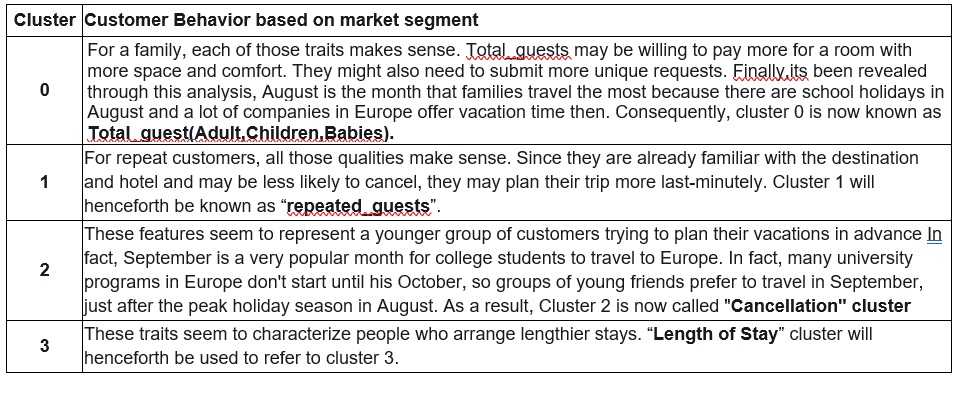

---




# ***Conclusion***

---



This study conduted to unwrap the information using unsupervised learning - clustering in the dataset regarding the hotel booking cancellation. 
Both k-means and k-prototype clustering was used in this study. In order to handle both numerical and categorical data, I have decided to go with  K- prototype than K-means.K-protytpe measures the distance between numerical features using the Euclidean distance , but also measures the distance between categorical features using the number of corresponding classes.
The clusters generated by K-Prototypes outperformed than K-means in both visually and empirically. Although both  algorithms divide customers into distinct groups, the groups created by k prototype are more informative and therefore potentially more useful to marketers.


---


**Findings:** 
This approach helped to identify profitable`guests based on Customer Market Segmentation`. As per the study conducted,, cancellation, total_guest, repeat guest, and the LOS were the other 4 client clusters that we were able to pinpoint. Hotels can use those clusters to better anticipate their visitors, interact with them in a more focused way, and estimate the risk of cancellation. in order to attract guests and increase the business, Hotel owner could offer special discount / promotions for online segment and groups segment guests.

---



As a future enchancement, the clustering result could be used as a target for the best fit classification models, in order to predict the booking cancellation